In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd

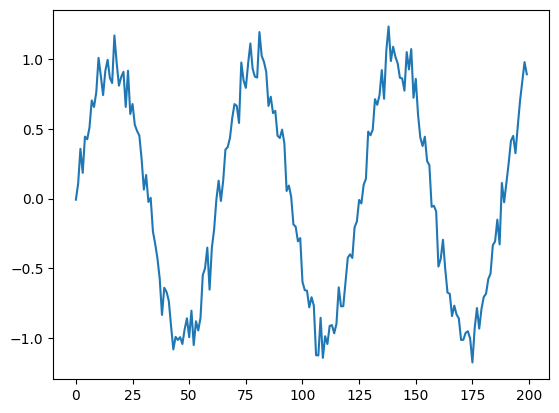

In [2]:
series=np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [3]:
#  building out dataset, we will try to predict next value with 10 previous values
T=10 # we will use 10 time stamps to predict the next time stamp
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)



In [4]:
X=np.array(X)
Y=np.array(Y)

print(f"X shape: {X.shape} Y shape: {Y.shape}")

X shape: (190, 10) Y shape: (190,)


In [5]:
# creating autoregressive linear model

i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

In [6]:
N=len(X)

In [7]:
# Training the rnn
r=model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 2s 99ms/step - loss: 0.2672 - val_loss: 0.1290
Epoch 2/80
3/3 [==============================] - 0s 27ms/step - loss: 0.1556 - val_loss: 0.1007
Epoch 3/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0620 - val_loss: 0.1106
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0917 - val_loss: 0.0395
Epoch 5/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0430 - val_loss: 0.0851
Epoch 6/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0659 - val_loss: 0.0504
Epoch 7/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0558 - val_loss: 0.0527
Epoch 8/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0416 - val_loss: 0.0403
Epoch 9/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0394 - val_loss: 0.0331
Epoch 10/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0293 - val_loss: 0.0379
Epoch 11/80
3/3 [============

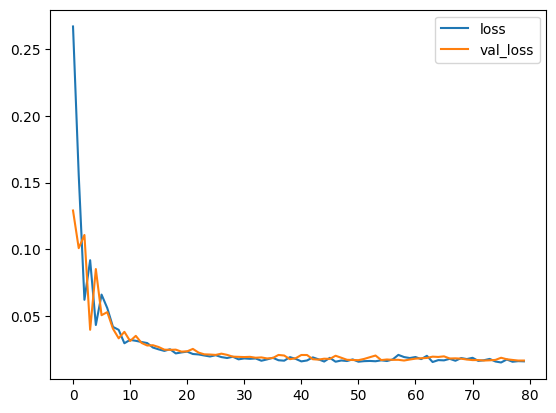

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# wrong forcast using true targets
validation_target=Y[-N//2:]
validation_predictions=[]

i=-N//2

while len(validation_predictions)<len(validation_target):
  p=model.predict(X[i].reshape(1, -1))[0][0]
  i+=1
  validation_predictions.append(p)

1/1 [==============================] - 0s 22ms/step


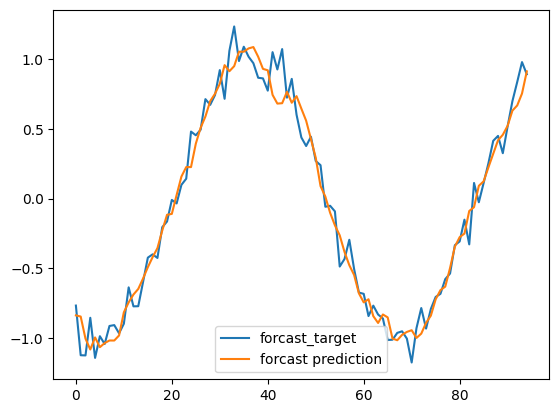

In [10]:
plt.plot(validation_target, label='forcast_target')
plt.plot(validation_predictions, label='forcast prediction')
plt.legend()

In [11]:
# previously we were using the already given values to predict the next values but now we should use what we predicted to find the values for the furthur series.

validation_target=Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2] # the last training input, 1D array of length T

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1, -1))[0][0]
  validation_predictions.append(p)
  last_x=np.roll(last_x, -1)
  last_x[-1]=p

1/1 [==============================] - 0s 20ms/step


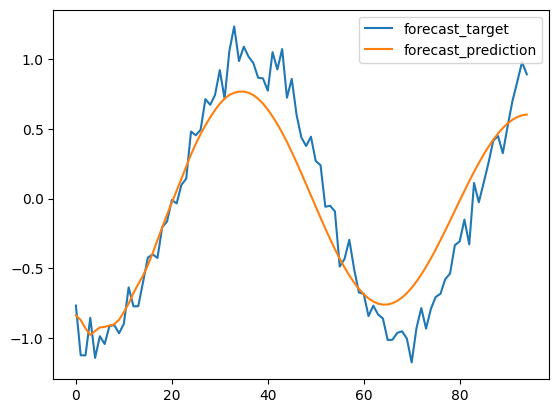

In [12]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()